In [1]:
%autosave 10

Autosaving every 10 seconds


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

In [79]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response


['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2, random_state=24
)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [83]:
dic= {'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

In [84]:
from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(rf,param_grid=dic,verbose=2)


In [85]:
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

In [86]:
results = pd.DataFrame(rf_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.403278,0.031419,0.013081,0.002067,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.823125,0.815625,0.820625,0.818750,0.816250,0.818875,0.002778,11
1,1.977625,0.035893,0.054981,0.006430,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.817500,0.811875,0.810625,0.815625,0.808958,0.812917,0.003173,14
2,3.628700,0.220313,0.115837,0.016704,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.812083,0.811250,0.810833,0.812500,0.808333,0.811000,0.001458,16
3,7.857286,0.166719,0.205754,0.005478,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.813542,0.813750,0.811042,0.816250,0.808333,0.812583,0.002689,15
4,0.680236,0.025805,0.016609,0.002886,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.822292,0.817917,0.820417,0.818542,0.815000,0.818833,0.002453,12
5,3.125933,0.286349,0.067702,0.012037,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.824167,0.818750,0.824375,0.820208,0.815833,0.820667,0.003263,3
6,6.442964,0.353489,0.131196,0.015282,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.823958,0.818542,0.825417,0.820417,0.815000,0.820667,0.003744,3
7,12.395567,0.918571,0.234064,0.033698,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.823750,0.817917,0.826250,0.820208,0.815417,0.820708,0.003899,2
8,0.952320,0.076092,0.018980,0.003842,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.823333,0.818125,0.821667,0.819167,0.813958,0.819250,0.003218,10
9,4.472670,0.134023,0.080144,0.003684,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.823542,0.817708,0.825833,0.817292,0.815625,0.820000,0.003957,5


In [87]:
rf_cv.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [88]:
h1, h2 = np.meshgrid([3,6,9,12], [10,50,100,200])
scores = results.mean_test_score.values.reshape(4,4)
print(h1)
print(h2)
print(scores)

[[ 3  6  9 12]
 [ 3  6  9 12]
 [ 3  6  9 12]
 [ 3  6  9 12]]
[[ 10  10  10  10]
 [ 50  50  50  50]
 [100 100 100 100]
 [200 200 200 200]]
[[0.818875   0.81291667 0.811      0.81258333]
 [0.81883333 0.82066667 0.82066667 0.82070833]
 [0.81925    0.82       0.81970833 0.819625  ]
 [0.81508333 0.819625   0.81979167 0.82083333]]


Text(0, 0.5, 'Y coordinate')

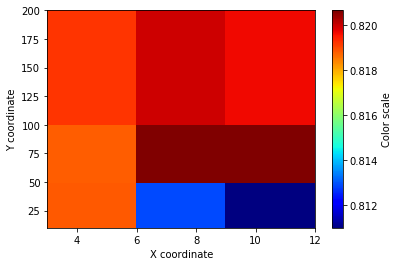

In [89]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(h1, h2, scores, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

In [90]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':rf_cv.best_estimator_.feature_importances_
})

In [91]:
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_0,0.306364
0,LIMIT_BAL,0.060749
11,PAY_AMT1,0.059828
12,PAY_AMT2,0.054988
5,BILL_AMT1,0.053887
6,BILL_AMT2,0.051335
7,BILL_AMT3,0.048516
8,BILL_AMT4,0.045967
13,PAY_AMT3,0.044906
9,BILL_AMT5,0.044404
